In [287]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import BatchNormalization

## LOAD DATA

In [288]:
df = pd.read_csv('../Dataset/dataset65000.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30964\3179810205.py:1: DtypeWarning: Columns (11,34,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Dataset/dataset65000.csv')


In [289]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,...,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g,carbohydrates-total_100g
0,2,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1722606455,2024-08-02T13:47:35Z,1749171851,2025-06-06T01:04:11Z,altroconsumo,1749171851,2025-06-06T01:04:11Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1752485388,2025-07-14T09:29:48Z,1752485389,2025-07-14T09:29:49Z,NaN,1752485389,2025-07-14T09:29:49Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,http://world-en.openfoodfacts.org/product/0000...,elcoco,1560176426,2019-06-10T14:20:26Z,1748094869,2025-05-24T13:54:29Z,smoothie-app,1748094869,2025-05-24T13:54:29Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1754314021,2025-08-04T13:27:01Z,1754314023,2025-08-04T13:27:03Z,NaN,1754314023,2025-08-04T13:27:03Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,http://world-en.openfoodfacts.org/product/0000...,maldan,1732037972,2024-11-19T17:39:32Z,1749357659,2025-06-08T04:40:59Z,smoothie-app,1749357659,2025-06-08T04:40:59Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA CLEANING

In [290]:
necessaryCol = [
    'nova_group', 
    'energy-kcal_100g', 
    'fat_100g', 
    'carbohydrates_100g',
    'proteins_100g',
    'saturated-fat_100g', 
    'trans-fat_100g', 
    'sugars_100g', 
    'added-sugars_100g',
    'sodium_100g', 
    'salt_100g',
    'fiber_100g'
]

In [291]:
label_col = 'nova_group'

In [292]:
df = df[necessaryCol]

In [ ]:
df.head()

In [293]:
for i in necessaryCol:
    if i == 'nova_group':
        continue
    else:
        df[i] = df[i] / 100

In [294]:
df.head()

,nova_group,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g,saturated-fat_100g,trans-fat_100g,sugars_100g,added-sugars_100g,sodium_100g,salt_100g,fiber_100g
0,NaN,1.41,0.027,0.009,0.30,0.006,0.0,0.0620,NaN,0.0016,0.0040,0.022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.24,0.120,0.130,0.23,0.105,0.0,0.0900,NaN,0.0012,0.0030,0.360
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,3.63,0.110,0.250,0.22,0.020,0.0,0.0098,0.0,0.0038,0.0095,0.090


In [295]:
df.drop_duplicates(inplace=True)

In [296]:
print("Missing values and percentages:")
missing_counts = df.isna().sum()
missing_percentages = (missing_counts / len(df)) * 100

print("Missing counts:")
print(missing_counts)
print("\nMissing percentages:")
print(missing_percentages)

Missing values and percentages:
Missing counts:
nova_group            20048
energy-kcal_100g        412
fat_100g                777
carbohydrates_100g      473
proteins_100g           723
saturated-fat_100g     5334
trans-fat_100g        23374
sugars_100g            3056
added-sugars_100g     38422
sodium_100g            6328
salt_100g              6328
fiber_100g            11289
dtype: int64

Missing percentages:
nova_group            47.175095
energy-kcal_100g       0.969480
fat_100g               1.828364
carbohydrates_100g     1.113020
proteins_100g          1.701297
saturated-fat_100g    12.551474
trans-fat_100g        55.001530
sugars_100g            7.191096
added-sugars_100g     90.411088
sodium_100g           14.890463
salt_100g             14.890463
fiber_100g            26.564228
dtype: float64


In [297]:
df = df.dropna(subset=['nova_group']).reset_index(drop=True)

In [298]:
print("Missing values and percentages:")
missing_counts = df.isna().sum()
missing_percentages = (missing_counts / len(df)) * 100

print("Missing counts:")
print(missing_counts)
print("\nMissing percentages:")
print(missing_percentages)

Missing values and percentages:
Missing counts:
nova_group                0
energy-kcal_100g        256
fat_100g                 89
carbohydrates_100g       74
proteins_100g           175
saturated-fat_100g     2663
trans-fat_100g         6425
sugars_100g            1026
added-sugars_100g     20991
sodium_100g             588
salt_100g               588
fiber_100g             3887
dtype: int64

Missing percentages:
nova_group             0.000000
energy-kcal_100g       1.140363
fat_100g               0.396454
carbohydrates_100g     0.329636
proteins_100g          0.779545
saturated-fat_100g    11.862444
trans-fat_100g        28.620429
sugars_100g            4.570359
added-sugars_100g     93.505279
sodium_100g            2.619270
salt_100g              2.619270
fiber_100g            17.314802
dtype: float64


In [299]:
df.head()

,nova_group,energy-kcal_100g,fat_100g,carbohydrates_100g,proteins_100g,saturated-fat_100g,trans-fat_100g,sugars_100g,added-sugars_100g,sodium_100g,salt_100g,fiber_100g
0,4.0,3.58,0.0200,0.067,0.7600,0.00500,NaN,0.017,NaN,0.006000,0.015000,0.107143
1,4.0,3.60,0.0140,0.045,0.8300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,4.60,0.2400,0.540,0.0640,0.06000,NaN,0.310,NaN,0.001920,0.004800,0.014000
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1.23,0.0176,0.247,0.0176,0.00882,NaN,0.000,NaN,0.000353,0.000882,0.017600


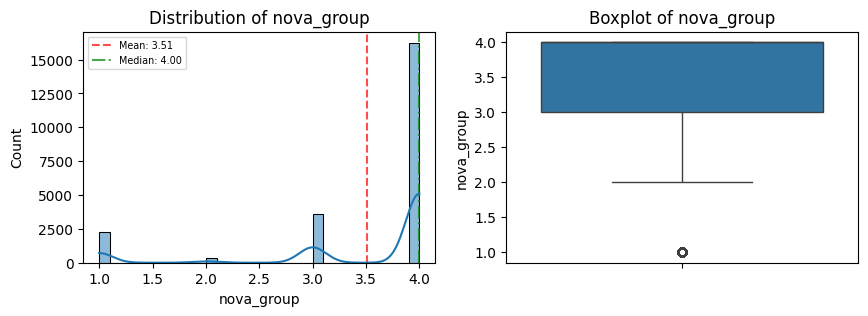

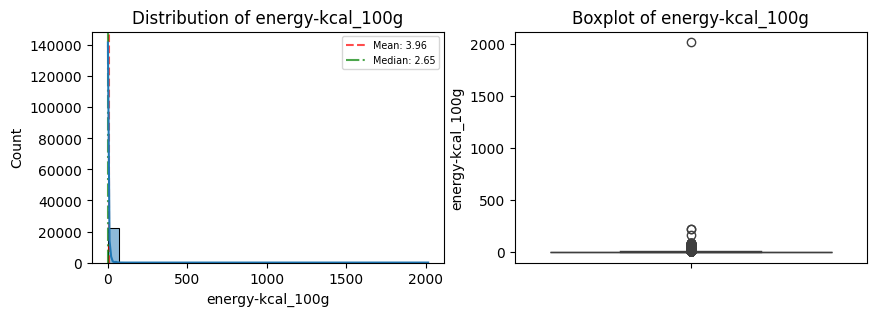

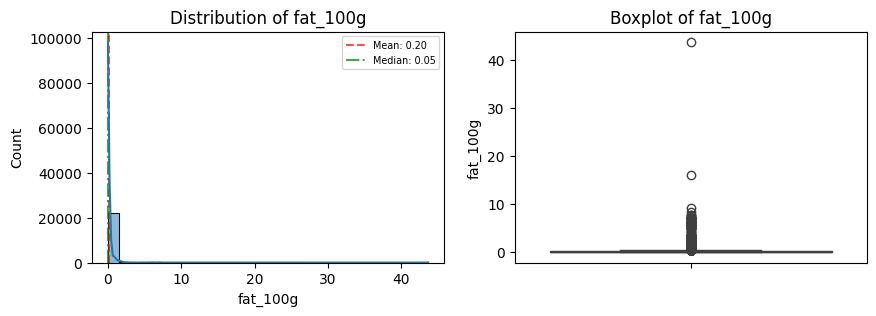

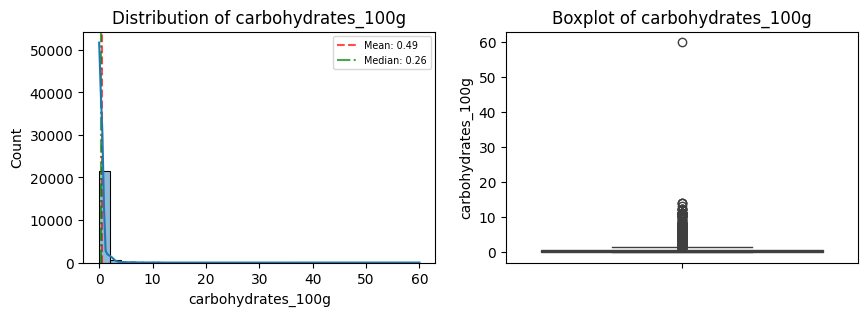

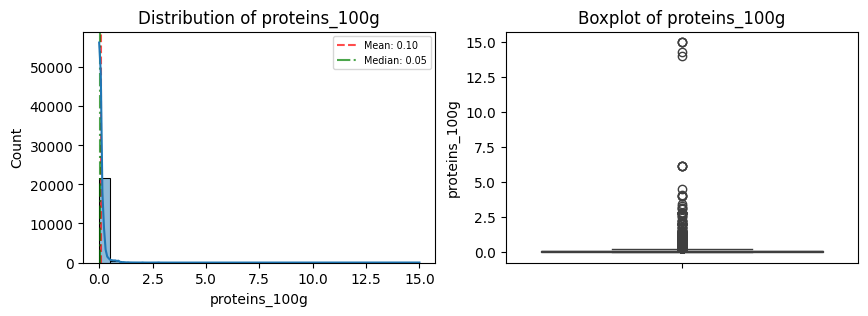

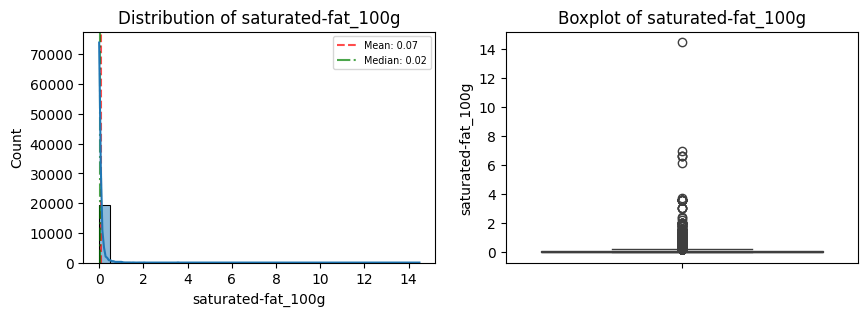

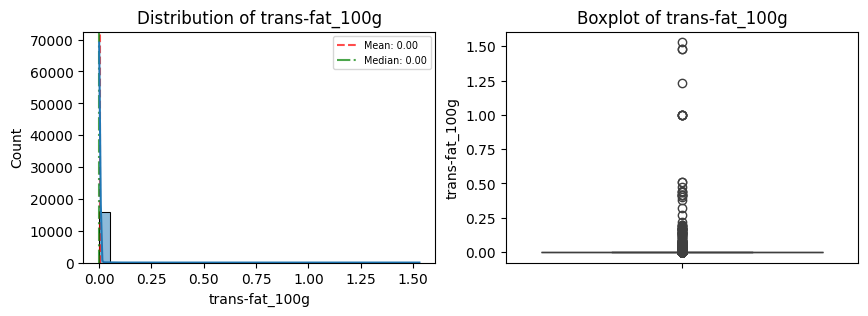

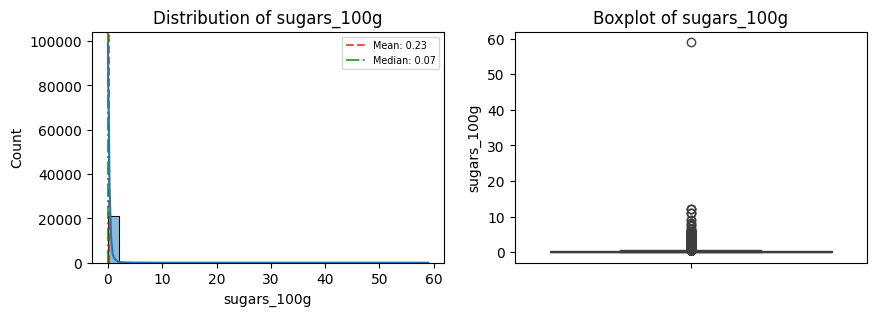

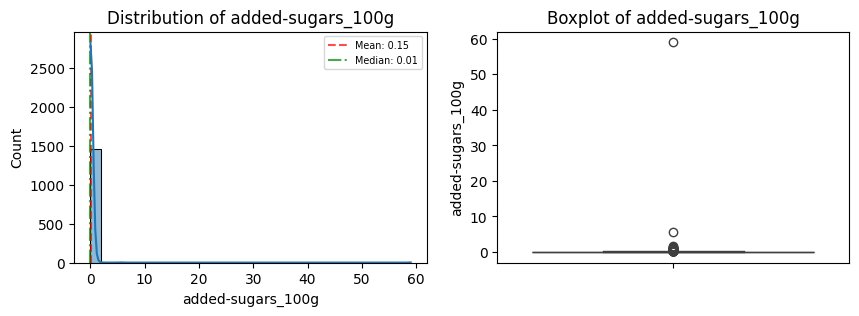

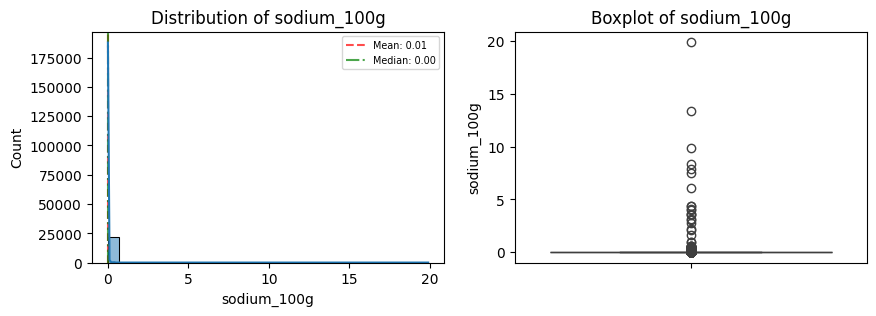

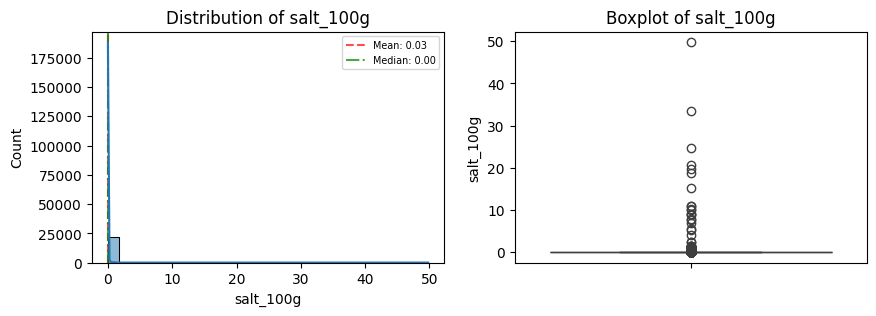

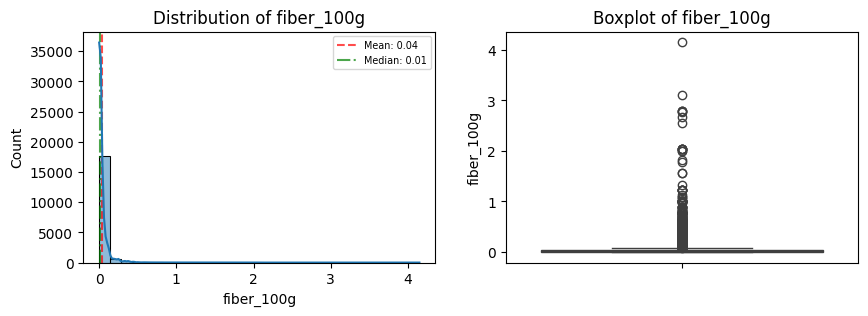

In [300]:
# Plotting the numerical columns
for col in df.columns:
        plt.figure(figsize=(10, 3))

        # Plot Histogram
        mean = df[col].mean()
        median = df[col].median()
        skew = df[col].skew()
        kurt = df[col].kurt()
        plt.subplot(1, 2, 1)
        plt.axvline(mean, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean:.2f}')
        plt.axvline(median, color='green', linestyle='-.', alpha=0.7, label=f'Median: {median:.2f}')
        plt.legend(fontsize='x-small')
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')

        # Plot Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')

        plt.show()

data is skewed so impute using median

In [301]:
for col in df.columns:
    if col != label_col:
        df[col] = df[col].fillna(df[col].median())

In [302]:
print("Missing values and percentages:")
missing_counts = df.isna().sum()
missing_percentages = (missing_counts / len(df)) * 100

print("Missing counts:")
print(missing_counts)
print("\nMissing percentages:")
print(missing_percentages)

Missing values and percentages:
Missing counts:
nova_group            0
energy-kcal_100g      0
fat_100g              0
carbohydrates_100g    0
proteins_100g         0
saturated-fat_100g    0
trans-fat_100g        0
sugars_100g           0
added-sugars_100g     0
sodium_100g           0
salt_100g             0
fiber_100g            0
dtype: int64

Missing percentages:
nova_group            0.0
energy-kcal_100g      0.0
fat_100g              0.0
carbohydrates_100g    0.0
proteins_100g         0.0
saturated-fat_100g    0.0
trans-fat_100g        0.0
sugars_100g           0.0
added-sugars_100g     0.0
sodium_100g           0.0
salt_100g             0.0
fiber_100g            0.0
dtype: float64


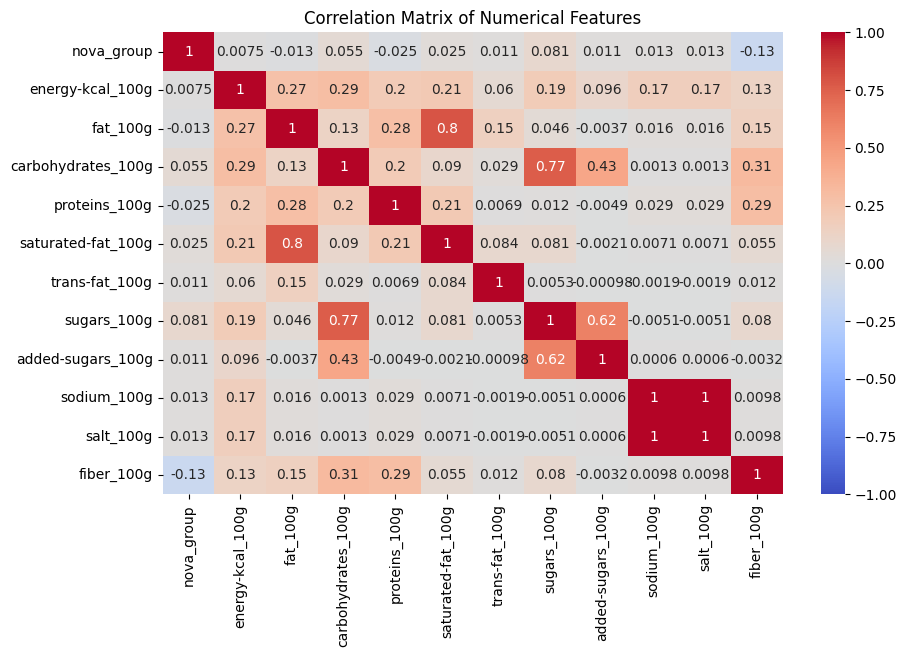

In [303]:
# bivariate analysis with correlation check
correlation_matrix = df[df.columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## SPLITTING DATA

In [304]:
x = df.drop(columns=[label_col])
y = df[label_col]

In [305]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=123)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.2, random_state=123)

## PRE PROCESSING

In [306]:
# Scale
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [307]:
# Encode
label_encoder = LabelEncoder()

# Fit the encoder on the training labels 
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_encoded, num_classes=num_classes)
y_val_cat = to_categorical(y_val_encoded, num_classes=num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes=num_classes)

In [308]:
print(f"Training set shape: X={x_train.shape}, y={y_train_cat.shape}")
print(f"Validation set shape: X={x_val.shape}, y={y_val_cat.shape}")
print(f"Test set shape: X={x_test.shape}, y={y_test_cat.shape}")

Training set shape: X=(15714, 11), y=(15714, 4)
Validation set shape: X=(1347, 11), y=(1347, 4)
Test set shape: X=(5388, 11), y=(5388, 4)


## DEFINING MODEL

In [309]:
# Check unique NOVA groups and their distribution
print("NOVA group distribution:")
print(y.value_counts().sort_index())
print(f"\nNumber of classes: {len(y.unique())}")

NOVA group distribution:
nova_group
1.0     2278
2.0      314
3.0     3615
4.0    16242
Name: count, dtype: int64

Number of classes: 4


In [310]:
num_classes = len(y.unique())
input_features = x_train.shape[1]
print(f"Input features: {input_features}")
print("Num classes:", num_classes)

Input features: 11
Num classes: 4


In [311]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_features,)),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')  
])

c:\Users\ASUS\anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [312]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model architecture
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,004 (46.89 KB)

 Trainable params: 12,004 (46.89 KB)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING

In [313]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

In [314]:
# Train the model
history = model.fit(
    x_train, y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val_cat),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6805 - loss: 0.9600 - val_accuracy: 0.7186 - val_loss: 0.7329
Epoch 2/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7155 - loss: 0.7597 - val_accuracy: 0.7223 - val_loss: 0.6879
Epoch 3/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7242 - loss: 0.7210 - val_accuracy: 0.7275 - val_loss: 0.6716
Epoch 4/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7320 - loss: 0.6961 - val_accuracy: 0.7246 - val_loss: 0.6617
Epoch 5/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7307 - loss: 0.6784 - val_accuracy: 0.7305 - val_loss: 0.6466
Epoch 6/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7348 - loss: 0.6760 - val_accuracy: 0.7394 - val_loss: 0.6366
Epoch 7/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7376 - loss: 0.6592 - val_accuracy: 0.7506 - val_loss: 0.6230
Epoch 8/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7380 - loss: 0.6586 - val_accu

## MODEL EVALUATION

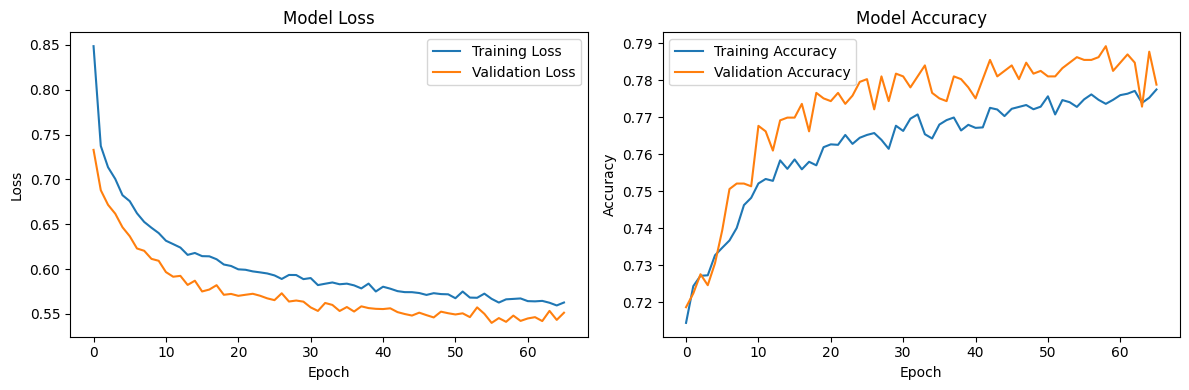

In [315]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [316]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7721
Test Loss: 0.5737


In [317]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [318]:
# Classification report
class_names = [f"NOVA {int(cls)}" for cls in sorted(y.unique())]
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

      NOVA 1       0.60      0.55      0.57       556
      NOVA 2       0.73      0.30      0.43        73
      NOVA 3       0.55      0.19      0.28       851
      NOVA 4       0.81      0.94      0.87      3908

    accuracy                           0.77      5388
   macro avg       0.67      0.49      0.54      5388
weighted avg       0.74      0.77      0.74      5388



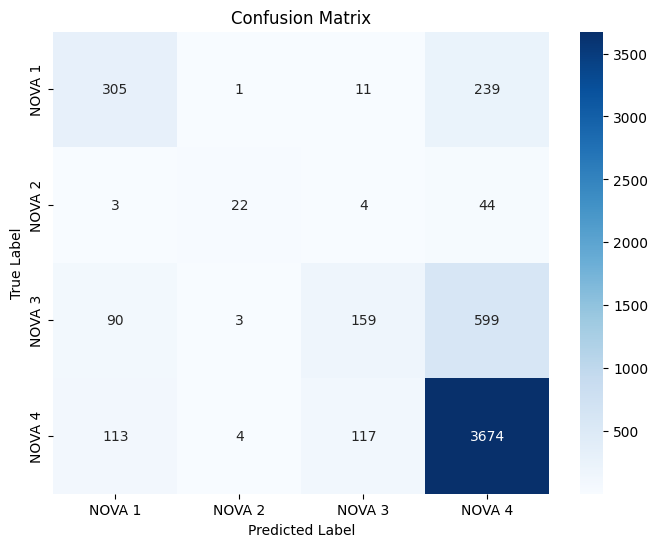

In [319]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

## HYPERPARAMETER TUNING

In [320]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weight_dict = dict(enumerate(class_weights))
print("Class weights:", class_weight_dict)

Class weights: {0: np.float64(2.494285714285714), 1: np.float64(16.933189655172413), 2: np.float64(1.5448289421942587), 3: np.float64(0.34569693769799364)}


In [341]:
hyper_model = Sequential([
    Dense(512, activation='relu', input_shape=(input_features,)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')
])

c:\Users\ASUS\anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [342]:
hyper_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [343]:
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

In [344]:
# Train the model
hyper_history = hyper_model.fit(
    x_train, y_train_cat,
    batch_size=32,
    epochs=100,
    validation_data=(x_val, y_val_cat),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1,
)

Epoch 1/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6119 - loss: 1.0978 - val_accuracy: 0.7238 - val_loss: 0.7260 - learning_rate: 0.0010
Epoch 2/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7129 - loss: 0.7404 - val_accuracy: 0.7246 - val_loss: 0.6689 - learning_rate: 0.0010
Epoch 3/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7199 - loss: 0.7184 - val_accuracy: 0.7261 - val_loss: 0.6545 - learning_rate: 0.0010
Epoch 4/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7354 - loss: 0.6861 - val_accuracy: 0.7379 - val_loss: 0.6309 - learning_rate: 0.0010
Epoch 5/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7339 - loss: 0.6647 - val_accuracy: 0.7335 - val_loss: 0.6293 - learning_rate: 0.0010
Epoch 6/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7449 - loss: 0.6499 - val_accuracy: 0.7506 - val_loss: 0.6276 - learning_rate: 0.0010
Epoch 7/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7449 - loss: 0.

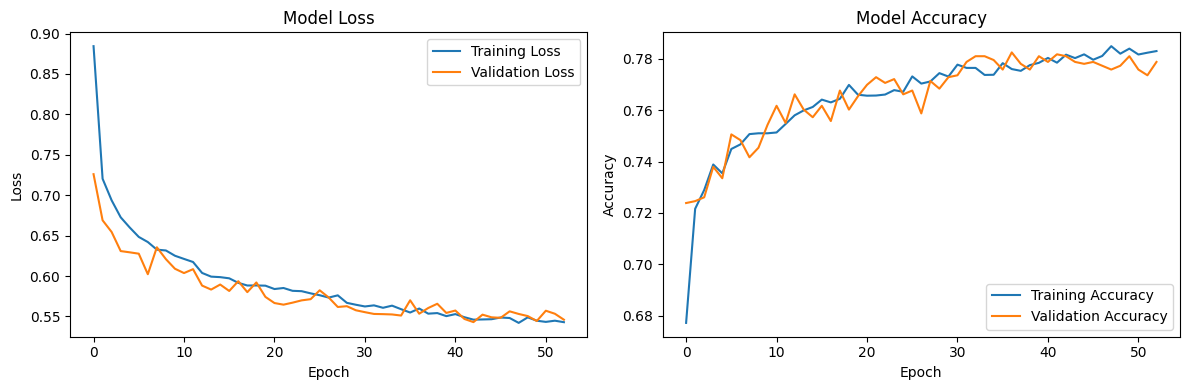

In [345]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hyper_history.history['loss'], label='Training Loss')
plt.plot(hyper_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hyper_history.history['accuracy'], label='Training Accuracy')
plt.plot(hyper_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [346]:
# Evaluate the model
test_loss, test_accuracy = hyper_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.7751
Test Loss: 0.5787


In [347]:
# Make predictions
y_pred = hyper_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [348]:
# Classification report
class_names = [f"NOVA {int(cls)}" for cls in sorted(y.unique())]
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

      NOVA 1       0.61      0.56      0.59       556
      NOVA 2       0.68      0.26      0.38        73
      NOVA 3       0.59      0.20      0.29       851
      NOVA 4       0.81      0.94      0.87      3908

    accuracy                           0.78      5388
   macro avg       0.67      0.49      0.53      5388
weighted avg       0.75      0.78      0.74      5388



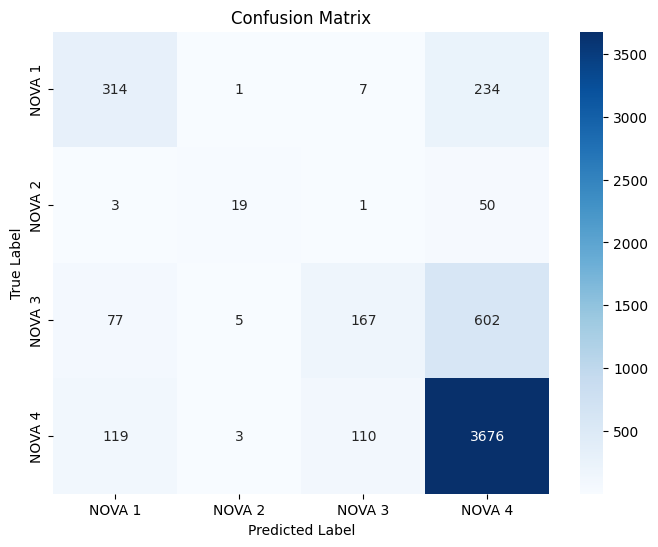

In [349]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()